# MOVIE RECOMMENDER SYSTEMS using COLLABORATIVE FILTERING 

## 1. Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from surprise import Reader,Dataset,SVD
from surprise.accuracy import rmse,mae
from surprise.model_selection import cross_validate

## 2. Importing the data

In [3]:

df=pd.read_csv("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Dropping the timestamp column in the dataframe

In [4]:
df.drop('timestamp',axis=1,inplace=True)

In [5]:
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


# 3.Checking for missing values

In [6]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

It seems that there is no missing values in the dataset.So its better to dive deep into Exploratory Data Analysis(EDA).

# 4. Exploratory Data Analysis

##  4.1 Number of movies/Number of users 

In [7]:
u_movies=df['movieId'].nunique()
u_users=df['userId'].nunique()

In [8]:
print(f"Number of unique movies:{u_movies}")
print(f"Number of unique movies:{u_users}")


Number of unique movies:9724
Number of unique movies:610


In [9]:
d=df.groupby('userId')['movieId'].count()

<BarContainer object of 610 artists>

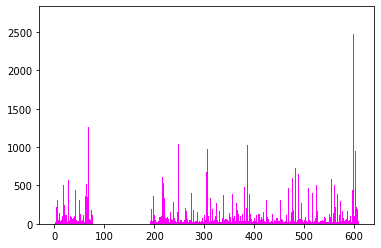

In [10]:
plt.bar(d.index,d.values,color='magenta')

This plot shows that a large portion of users having movieIds between 100 and 200 did not have a movieId corresponding to them.

## 4.2 Sparsity of ratings

Sparsity%=(No of missing values/total values)*100

In [11]:
available_ratings=df['rating'].count()
total=u_movies*u_users
missingratings=total-available_ratings
sparsity=(missingratings/total)*100
print('Sparsity =',sparsity)

Sparsity = 98.30003169443864


## 4.3 Rating Distributions

<BarContainer object of 10 artists>

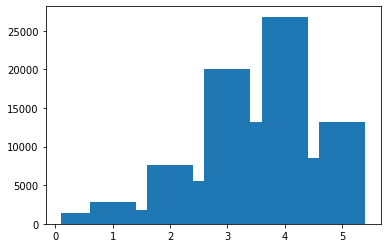

In [12]:
plt.bar(df['rating'].value_counts().index,df['rating'].value_counts())

# 5.Dimensionality Reduction

### 5.1 Filter movies with less than 3 ratings 

In [13]:
filter_movies=df['movieId'].value_counts()>3
filter_movies=filter_movies[filter_movies].index.tolist()

In [14]:
filter_users=df['userId'].value_counts()>3
filter_users=filter_users[filter_users].index.tolist()

In [15]:
df=df[(df['movieId'].isin(filter_movies))&(df['userId'].isin(filter_users))]

In [16]:
df.shape

(92394, 3)

## 6. Create Train and Test set

### 6.1 Columns used for training

In [25]:
cols=['userId','movieId','rating']

### 6.2 Create surprise dataset

In [24]:
reader=Reader(rating_scale=(0.5,5))
data=Dataset.load_from_df(df[cols],reader)

### 6.3 Create train-set and prediction-set

In [26]:
trainset=data.build_full_trainset()
antiset=trainset.build_anti_testset()

# 7. Creating and training model

## 7.1 Creating the model

SVD(Singular value decomposition)

Interaction matrix=AXBXC

In [27]:
algo=SVD(n_epochs=25,verbose=True)

## 7.2 Training the model 

Mean Absolute Error(MAE):MAE measures the average magnitude of the errors in a set of predictions,without considering their direction.

Root mean absolute error(RMSE):RMSE is the square root of the average of the squared differences between prediction and actual observation.

In [29]:
cross_validate(algo,data,measures=['RMSE','MAE'],cv=5,verbose=True)
print(">>training done")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

# 8.Making predictions based on the model

## 8.1 Making predictions for all pairs (users,items) that are not in training set 

In [36]:
predictions=algo.test(antiset)

In [43]:
predictions[1]

Prediction(uid=1, iid=1704, r_ui=3.529119856267723, est=4.675818638269028, details={'was_impossible': False})

## 8.2 Recommending top 3 movies based on predictions 

In [47]:
from collections import defaultdict
def get_top_n(predictions,n):
    top_n=defaultdict(list)
    for uid,iid,_,est,_ in predictions:
        top_n[uid].append((iid,est))
    for uid,user_ratings in top_n.items():
        user_ratings.sort(key=lambda x:x[1],reverse =True)
        top_n[uid]=user_ratings[:n]
    return top_n
    pass
top_n=get_top_n(predictions,n=3)
for uid,user_ratings in top_n.items():
    print(uid,[iid for (iid,rating) in user_ratings])

1 [318, 1272, 912]
2 [4226, 7361, 2571]
3 [6016, 177593, 3683]
4 [356, 318, 1954]
5 [1136, 2997, 246]
6 [1704, 4973, 1246]
7 [2959, 1178, 2115]
8 [3275, 4973, 1089]
9 [750, 1234, 933]
10 [919, 951, 1225]
11 [1234, 1250, 912]
12 [47, 110, 1206]
13 [527, 318, 1196]
14 [1172, 1223, 1266]
15 [1411, 1221, 1945]
16 [1237, 1172, 908]
17 [2324, 1250, 7361]
18 [912, 1225, 1250]
19 [296, 1036, 4973]
20 [858, 3949, 260]
21 [5971, 86345, 3200]
22 [1248, 1214, 1250]
23 [1172, 1223, 6016]
24 [908, 1207, 1217]
25 [296, 608, 1196]
26 [2959, 318, 858]
27 [1104, 899, 457]
28 [4973, 916, 105504]
29 [110, 912, 4226]
30 [904, 1225, 2019]
31 [2324, 3275, 50]
32 [750, 1172, 60069]
33 [2959, 55820, 47]
34 [7361, 1252, 1219]
35 [1225, 4973, 58559]
36 [356, 110, 858]
37 [908, 1250, 3578]
38 [1221, 260, 1196]
39 [2959, 4973, 16]
40 [750, 1250, 2959]
41 [55721, 1188, 1278]
42 [29, 1204, 5952]
43 [50, 333, 441]
44 [318, 50, 593]
45 [912, 750, 4995]
46 [246, 1089, 2571]
47 [1213, 58559, 1276]
48 [898, 1089, 858]
49

Thus we generated the top 3 movies we should recommend users based on similar interests also known as Collaborative filtering.

The above predictions have userid as its first column and a list of 3 movie ids which should be be recommended to that user.